Analysis of UK quantum companies
==============================

This workbook uses a simplied dataset to look at a simple clustering example.

You will need to install [Folium](https://pypi.org/project/folium/) to execute this notebook.

Import the necessary libraries, including the mapping tool, Folium.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import folium

Define constants used:

In [2]:
FILENAME = 'data/company_data.csv'
MAP_FILE = 'cluster_map.html'
PLOT3 = 'clusters.png'
NUMBER_OF_CLUSTERS = 10
MAP_CENTRE = [54, -2]             #Centre of Folium map
ZOOM_START = 5.5                  #Zoom for Folium map

Read the simplified data:

In [3]:
df = pd.read_csv(FILENAME)
df.head()

,BestEstimateEmployees,BestEstimateTurnover,Latitude,Longitude
0,27,3160000,50.39,-4.02
1,12,230000,50.44,-3.56
2,69,4799228,50.49,-3.55
3,4,1985000,50.53,-3.60
4,1,190000,50.55,-4.44


Clean the data by dropping any NaN in Latitude or Longitude.

In [4]:
df = df.dropna(subset={'Latitude', 'Longitude'})

Assign X variables.

In [5]:
df['Longitude']=pd.to_numeric(df.Longitude)
df['Latitude']=pd.to_numeric(df.Latitude)
X = df[['Latitude', 'Longitude']] 

Use KMeans clustering model as Model 1 to perform clustering:

In [6]:
model = KMeans(n_clusters=NUMBER_OF_CLUSTERS, random_state=0)
model.fit(X)

KMeans(n_clusters=10, random_state=0)

In [7]:
model_predict = model.predict(X)
centroids = model.cluster_centers_

Plot out the data, with different colours based on the clusters found (which are stored in the list model_predict).

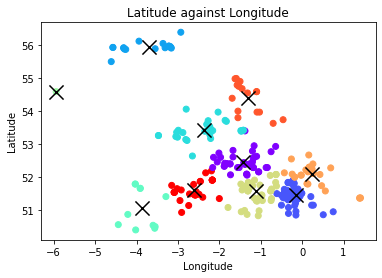

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Latitude against Longitude')
ax.scatter(X['Longitude'],X['Latitude'], c=model_predict, cmap='rainbow')
ax.scatter(centroids[:, 1], centroids[:, 0], c='black', marker="x", s=200, alpha=1)
fig.savefig(PLOT3)

In [9]:
centroids_list = centroids.tolist()
map = folium.Map(location=MAP_CENTRE, zoom_start=ZOOM_START)
for items in centroids_list:
    folium.Marker(items).add_to(map)

In [10]:
map

In [11]:
map.save(MAP_FILE)